In [ ]:
# |default_exp app

## Clasificador de Setas comunes en Galicia



In [32]:
#hide
!rm -rf model.pkl

In [1]:
#|export
!pip install gradio==3.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 5.2 MB/s 
     |████████████████████████████████| 213 kB 70.6 MB/s 
     |████████████████████████████████| 2.3 MB 58.1 MB/s 
     |████████████████████████████████| 84 kB 3.3 MB/s 
     |████████████████████████████████| 56 kB 5.0 MB/s 
     |████████████████████████████████| 272 kB 69.1 MB/s 
     |████████████████████████████████| 55 kB 2.2 MB/s 
     |████████████████████████████████| 63 kB 2.7 MB/s 
     |████████████████████████████████| 80 kB 10.9 MB/s 
     |████████████████████████████████| 46 kB 5.3 MB/s 
     |████████████████████████████████| 4.1 MB 36.7 MB/s 
     |████████████████████████████████| 593 kB 70.5 MB/s 
     |████████████████████████████████| 856 kB 47.4 MB/s 
     |████████████████████████████████| 58 kB 7.0 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4709 sha256=ba2be0c0b6410e0a86a81

In [2]:
#|export
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 548 kB 5.1 MB/s 
     |████████████████████████████████| 163 kB 54.4 MB/s 


In [3]:
#|export
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 4.9 MB/s 
     |████████████████████████████████| 5.5 MB 59.1 MB/s 
     |████████████████████████████████| 1.3 MB 66.9 MB/s 
     |████████████████████████████████| 441 kB 64.9 MB/s 
     |████████████████████████████████| 1.6 MB 64.4 MB/s 
     |████████████████████████████████| 115 kB 82.5 MB/s 
     |████████████████████████████████| 95 kB 4.7 MB/s 
     |████████████████████████████████| 212 kB 52.8 MB/s 
     |████████████████████████████████| 127 kB 49.4 MB/s 
     |████████████████████████████████| 115 kB 75.0 MB/s 
     |████████████████████████████████| 7.6 MB 48.0 MB/s 
Mounted at /content/gdrive


In [5]:
#|export
from fastbook import *
from fastai.vision.widgets import *
from fastai.vision.all import *
import gradio as gr
import timm

In [6]:
timm.list_models('convnext*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_small_384_in22ft1k',
 'convnext_small_in22ft1k',
 'convnext_small_in22k',
 'convnext_tiny',
 'convnext_tiny_384_in22ft1k',
 'convnext_tiny_hnf',
 'convnext_tiny_in22ft1k',
 'convnext_tiny_in22k',
 'convnext_xlarge_384_in22ft1k',
 'convnext_xlarge_in22ft1k',
 'convnext_xlarge_in22k']

In [7]:
ims = search_images_ddg('amanita-muscaria')
ims

(#200) ['https://www.indianamushrooms.com/images/amanita_muscaria_alba_4.jpg','https://external-preview.redd.it/nDOtHUKuV1ji-8Eo0KLAvvu71sW41NTVgx_sgVdDl9k.jpg?auto=webp&s=e1f5fc2a4d50c93adb78d7a4dbe46c009b9c1312','https://live.staticflickr.com/7305/8925667974_4e8375abe5_b.jpg','http://www.pd.infn.it/~dorigo/funghi2.jpg','https://c1.staticflickr.com/7/6170/6166530085_f657464a94_b.jpg','https://img2.juzaphoto.com/001/shared_files/uploads_hr/997797_large24050.jpg','https://files.shroomery.org/files/11-46/125747871-DSC00023.jpg','https://wpamushroomclub.org/wp-content/uploads/2019/11/Amanita-muscaria-var.-guessowii.-2.-By-Richard-Jacob.jpg','https://magicmushroomsdispensary.org/wp-content/uploads/2020/06/Amanita-Muscaria-mushroomsdispensary-2.jpg','http://files.shroomery.org/files/13-39/031147651-130926_0001.jpg'...]

In [8]:
dest = 'images/amanita-muscaria.jpg'
download_url(ims[0], dest, show_progress=False)

Path('images/amanita-muscaria.jpg')

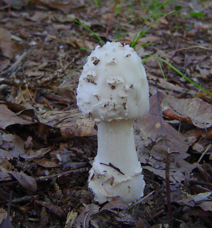

In [9]:
ims = Image.open(dest)
ims.to_thumb(228,228)

In [10]:
tipos_setas =  'Boletus','Cogordos', 'amillaria mellea', 'Cantarelos', 'Seta del cardo', 'Níscalos', 'macrolepiotas proceras','Seta Capuchina', 'Amatina phalloides','Amanita muscaria', 'Paxillus involutus', 'Agaricus campestris','Amanita virosa','Amanita verna','Cortinarius orellanus','Galerina marginata'


In [11]:
tipos_setas 

('Boletus',
 'Cogordos',
 'amillaria mellea',
 'Cantarelos',
 'Seta del cardo',
 'Níscalos',
 'macrolepiotas proceras',
 'Seta Capuchina',
 'Amatina phalloides',
 'Amanita muscaria',
 'Paxillus involutus',
 'Agaricus campestris',
 'Amanita virosa',
 'Amanita verna',
 'Cortinarius orellanus',
 'Galerina marginata')

In [12]:
path = Path('setas')

In [13]:
if not path.exists():
  path.mkdir()
  for s in tipos_setas:
    dest = (path/s)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{s} seta', max_images=100)
    download_images(dest, urls=results)

In [14]:
fns = get_image_files(path)
fns

(#1542) [Path('setas/Amatina phalloides/e937c160-f3ab-48c4-b20f-331490e165ee.jpg'),Path('setas/Amatina phalloides/2a971d17-335d-41cb-8414-38397dd24ade.jpg'),Path('setas/Amatina phalloides/bd404c06-6ddb-45c9-a228-4fa565a27ce1.jpg'),Path('setas/Amatina phalloides/c4bcf58e-279f-4821-8a53-a86ff9e1971f.jpg'),Path('setas/Amatina phalloides/e2c5d63f-3787-4a3d-aa69-05efbb003557.JPG'),Path('setas/Amatina phalloides/b716826b-9a9a-4940-b0bd-f4a2ec2fadc8.jpg'),Path('setas/Amatina phalloides/fc0cf908-3ee0-4889-bafd-65fb7874e619.jpg'),Path('setas/Amatina phalloides/81bce64f-f366-4792-9048-63d4a9b202a4.JPG'),Path('setas/Amatina phalloides/80b39a53-e6ac-4f01-9089-9c1905bd2e18.jpg'),Path('setas/Amatina phalloides/116fae5b-30cb-4ba9-a684-87ee81950517.jpg')...]

In [15]:
failed = verify_images(fns)
failed

(#2) [Path('setas/Amanita muscaria/890b83bd-436d-4c2a-9331-25a1fcf3a6be.jpg'),Path('setas/Amanita muscaria/568e448b-2b0d-49e9-a7a8-6cb58ed74773.jpg')]

In [16]:
failed.map(Path.unlink)

(#2) [None,None]

In [17]:
mushroom = DataBlock(
    blocks= (ImageBlock, CategoryBlock),
    get_items= get_image_files,
    splitter= RandomSplitter(valid_pct= 0.2, seed=42),
    get_y= parent_label,
    item_tfms=Resize(128)
)

In [18]:
dls = mushroom.dataloaders(path)

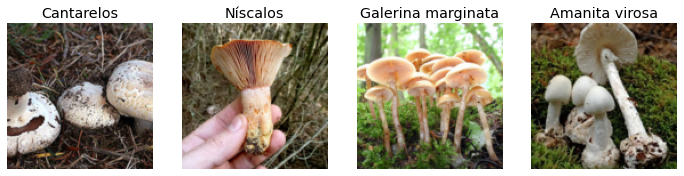

In [19]:
dls.valid.show_batch(max_n=4, nrows=1)

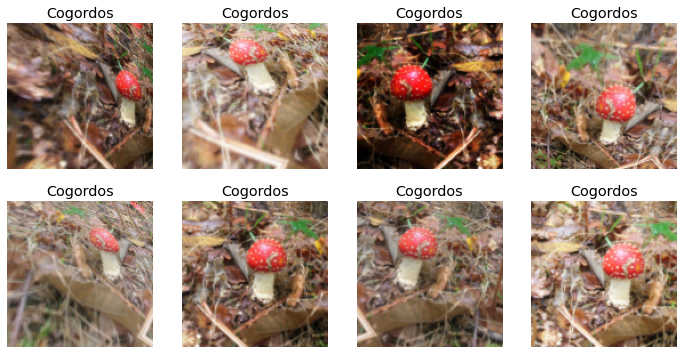

In [20]:
mushroom = mushroom.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = mushroom.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [21]:
learn = vision_learner(dls, 'convnext_tiny_in22k', metrics=error_rate).to_fp16() #convnext_tiny_in22k
learn.fine_tune(3)

Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_tiny_22k_224.pth" to /root/.cache/torch/hub/checkpoints/convnext_tiny_22k_224.pth


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [23]:
learn = vision_learner(dls, resnet34, metrics=error_rate).to_fp16() #convnext_tiny_in22k
learn.fine_tune(3)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


# Try improving the model



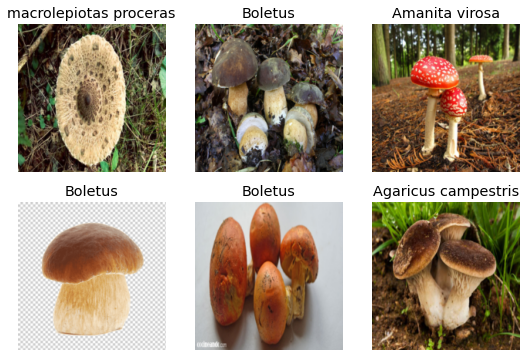

In [24]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items= get_image_files,
    splitter= RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [25]:
learn = vision_learner(dls, resnet34, metrics=error_rate).to_fp16() #convnext_tiny_in22k
learn.fine_tune(3)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [26]:
learn = vision_learner(dls, 'convnext_tiny_in22k', metrics=error_rate).to_fp16() #convnext_tiny_in22k
learn.fine_tune(5)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

In [31]:
is_mushroom,_,probs= learn.predict(PILImage.create('images/pinicola.jpeg'))
print(f"This is a: {is_mushroom}.")
print(f"Probabilidad de que sea una seta..: {probs[0]:.4f}")

This is a: Boletus.
Probabilidad de que sea una seta..: 0.0002


# Exportamos el modelo

In [33]:
learn.export('model.pkl')